<a href="https://colab.research.google.com/github/eminekilics/Student_Performance_Data24/blob/main/SPD24_Student_Performance_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing necessary libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

loading the dataset

In [37]:
df = pd.read_csv("spd24.csv")

columns that should be numerical: Attendance Rate, Study Hours

In [38]:
df["Attendance Rate"] = df["Attendance Rate"].str.replace(";", ".").astype(float)
df["Study Hours"] = df["Study Hours"].str.replace(";", ".").astype(float)

target and independent variables

In [39]:
target = "Performance Score"
y = df[target]

encode categorical columns

In [40]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object" and col != target:
        df[col] = le.fit_transform(df[col])

convert the target column to a number

In [41]:
y = le.fit_transform(y)

X = all columns (except the target)

In [42]:
X = df.drop(columns=[target])

In [43]:
print("First 5 row:")
print(df.head())

First 5 row:
   Student ID  Gender  Age  Grade Level  Attendance Rate  Study Hours  \
0           1       1   15           12        80.487800     2.764496   
1           2       0   17           12        96.242678     4.534785   
2           3       1   14            9        84.649681     2.008148   
3           4       1   14           10        86.158599     3.698293   
4           5       1   15           10        88.487638     3.408604   

   Parental Education Level  Parental Involvement  Extracurricular Activities  \
0                         1                     0                           1   
1                         1                     0                           1   
2                         1                     2                           1   
3                         3                     0                           0   
4                         0                     1                           0   

   Socioeconomic Status  ...  Bullying Incidents  Special Edu

access to data information

In [44]:
print("\n Data Information:")
print(df.info())

print("\n Missing Values:")
print(df.isnull().sum())


 Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student ID                       98000 non-null  int64  
 1   Gender                           98000 non-null  int64  
 2   Age                              98000 non-null  int64  
 3   Grade Level                      98000 non-null  int64  
 4   Attendance Rate                  98000 non-null  float64
 5   Study Hours                      98000 non-null  float64
 6   Parental Education Level         98000 non-null  int64  
 7   Parental Involvement             98000 non-null  int64  
 8   Extracurricular Activities       98000 non-null  int64  
 9   Socioeconomic Status             98000 non-null  int64  
 10  Previous Academic Performance    98000 non-null  int64  
 11  Class Participation              98000 non-null  int64  
 12

visualizations

countplot → displays the number of women/men in the “gender” column as a graph.

/tmp/ipython-input-2635323643.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="Set2")


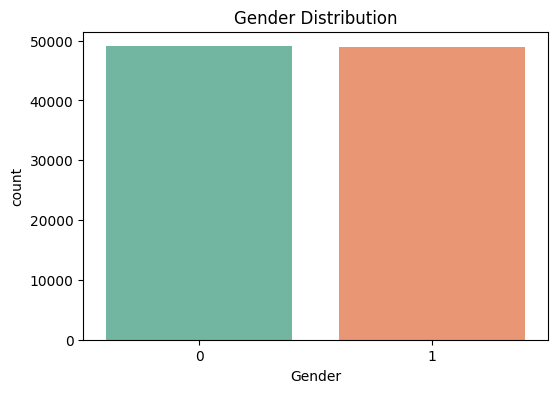

In [45]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df, palette="Set2")
plt.title("Gender Distribution")
plt.show()

histplot → shows the distribution of ages in the “age” column (how many people are 20 years old, how many are 25 years old, etc.).

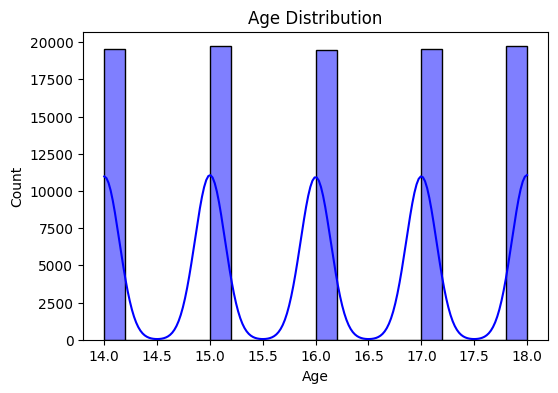

In [46]:
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=20, kde=True, color="blue")
plt.title("Age Distribution")
plt.show()

heatmap → Sayısal sütunlar arasındaki ilişkiyi gösteriyor. (Örn. yaş arttıkça başarı artıyor mu?).

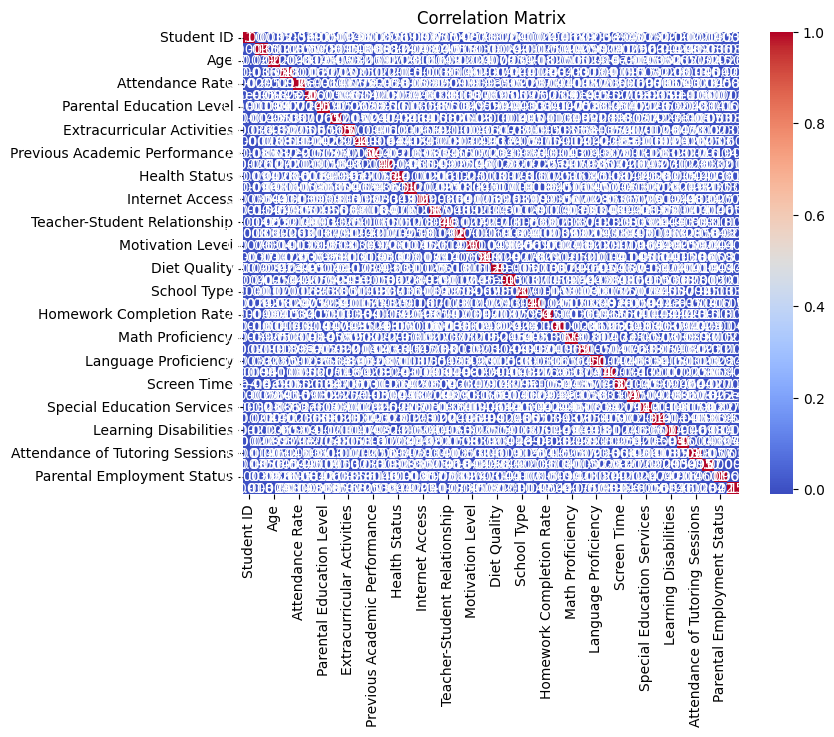

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

training and test data

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

build and train the model

In [49]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

predicting

In [50]:
y_pred = model.predict(X_test)

classification_report → Shows accuracy, precision, recall, and F1 score.

In [51]:
print("\n Classification Report:")
print(classification_report(y_test, y_pred))


 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7376
           1       0.92      0.88      0.90      4854
           2       0.88      0.90      0.89      7370

    accuracy                           0.91     19600
   macro avg       0.92      0.91      0.91     19600
weighted avg       0.91      0.91      0.91     19600



confusion_matrix → Shows the model's correct/incorrect predictions in a table.


 Confusion Matrix:


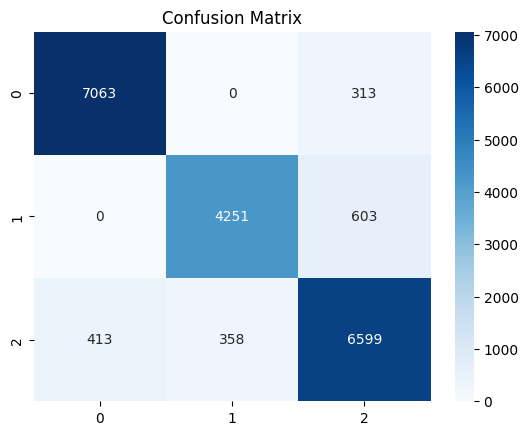

In [52]:
print("\n Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

/tmp/ipython-input-4046209695.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set1")


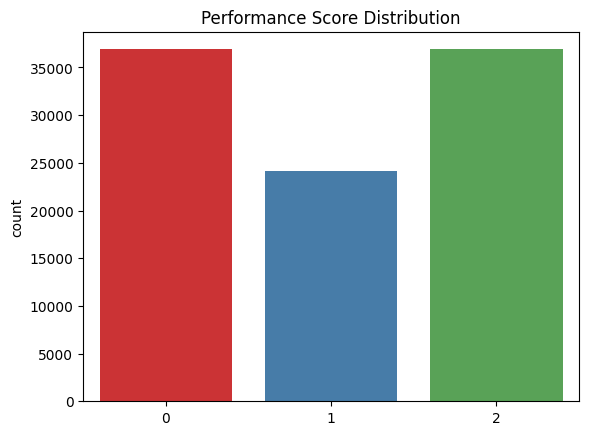

In [53]:
sns.countplot(x=y, palette="Set1")
plt.title("Performance Score Distribution")
plt.show()